In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
np.random.seed(42)
n_visits=10000
a_weight=0.10
b_weight=0.12

### Simulate click‐through data (visits vs. purchases) for A and B.


In [ ]:
purchases_A = np.random.binomial(n=n_visits, p=a_weight)
purchases_B = np.random.binomial(n=n_visits, p=b_weight)

data = {
    "Website": ["A", "B"],
    "Visits": [n_visits, n_visits],
    "Purchases": [purchases_A, purchases_B]
}
df = pd.DataFrame(data)
df["Conversion Rate"] = df["Purchases"] / df["Visits"]
print(df)

  Website  Visits  Purchases  Conversion Rate
0       A   10000        973           0.0973
1       B   10000       1134           0.1134


here website B has more purchases than website A

### Calculate conversion rates and 95% confidence intervals.


In [ ]:
# Calculate standard error
df["SE"] = np.sqrt(df["Conversion Rate"] * (1 - df["Conversion Rate"]) / df["Visits"])

# Calculate confidence interval
z = 1.96  # for 95%
df["CI Lower"] = df["Conversion Rate"] - z * df["SE"]
df["CI Upper"] = df["Conversion Rate"] + z * df["SE"]
print(df[["Website", "Conversion Rate", "CI Lower", "CI Upper"]])


  Website  Conversion Rate  CI Lower  CI Upper
0       A           0.0973  0.091491  0.103109
1       B           0.1134  0.107185  0.119615


The confidence intervals do not overlap, suggesting a statistically significant difference

### Plot conversion rates with error bars.

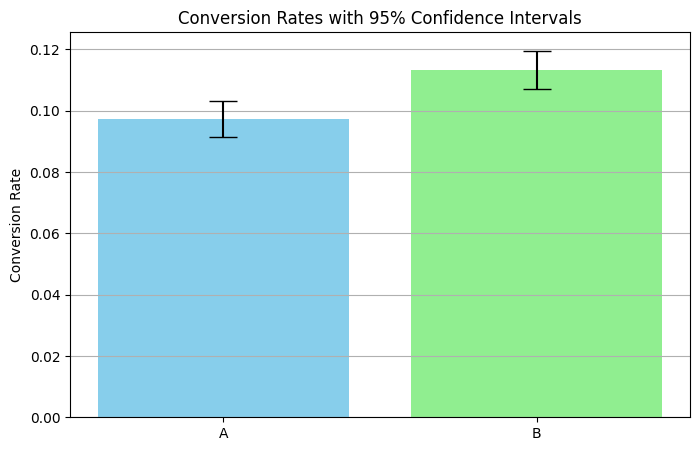

In [ ]:
plt.figure(figsize=(8, 5))
plt.bar(df["Website"], df["Conversion Rate"], yerr=z * df["SE"], capsize=10, color=["skyblue", "lightgreen"])
plt.ylabel("Conversion Rate")
plt.title("Conversion Rates with 95% Confidence Intervals")
plt.grid(axis='y')
plt.show()

here as we can see the 95% of conversion rate is not overlapping

### Perform a two‐proportion z‐test to see if B beats A.

In [30]:
from statsmodels.stats.proportion import proportions_ztest
success = df["Purchases"].values
nobs = df["Visits"].values

z_stat, p_val = proportions_ztest(count=success, nobs=nobs, alternative='smaller')  # A < B
print(f"Z-statistic: {z_stat:.4f}, P-value: {p_val:.4f}")


Z-statistic: -5.6885, P-value: 0.0000


Since p < 0.05, we reject the null hypothesis — Website B significantly outperforms Website A in conversion rate.



### Real-Time Monitoring & Sequential Testing

In [ ]:
# Simulate real-time incoming data
n = 10000
real_time_A = np.random.binomial(1, a_weight, n)
real_time_B = np.random.binomial(1, b_weight, n)

# Cumulative z-test after every 500 users

checkpoints = np.arange(500, n+1, 500)
for i in checkpoints:
    count = [real_time_A[:i].sum(), real_time_B[:i].sum()]
    nobs = [i, i]
    z_stat, p_val = proportions_ztest(count, nobs, alternative='smaller')
    print(f"Checkpoint {i}: Z = {z_stat:.3f}, P = {p_val:.4f}")

Checkpoint 500: Z = -0.980, P = 0.1635
Checkpoint 1000: Z = -1.572, P = 0.0579
Checkpoint 1500: Z = -2.018, P = 0.0218
Checkpoint 2000: Z = -2.849, P = 0.0022
Checkpoint 2500: Z = -3.097, P = 0.0010
Checkpoint 3000: Z = -3.154, P = 0.0008
Checkpoint 3500: Z = -3.811, P = 0.0001
Checkpoint 4000: Z = -4.065, P = 0.0000
Checkpoint 4500: Z = -4.609, P = 0.0000
Checkpoint 5000: Z = -4.542, P = 0.0000
Checkpoint 5500: Z = -4.420, P = 0.0000
Checkpoint 6000: Z = -4.318, P = 0.0000
Checkpoint 6500: Z = -4.586, P = 0.0000
Checkpoint 7000: Z = -4.676, P = 0.0000
Checkpoint 7500: Z = -4.861, P = 0.0000
Checkpoint 8000: Z = -4.926, P = 0.0000
Checkpoint 8500: Z = -5.075, P = 0.0000
Checkpoint 9000: Z = -5.765, P = 0.0000
Checkpoint 9500: Z = -6.286, P = 0.0000
Checkpoint 10000: Z = -6.520, P = 0.0000


🈁 we can see that as the visitors increase the Z score decrease so does the p value.
